import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import os 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from joblib import dump ,load
plt.style.use('ggplot')
fontdict = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 14,
}


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import os 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from joblib import dump ,load
plt.style.use('ggplot')
fontdict = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 14,
}


In [2]:
df_3 = pd.read_csv('data.csv')

In [3]:
df_3

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.000,0.0,30,...,0.022,0.01,0.02,0.01,0.00,825,0.070,0.020,0.040,232
1,2,885,30,0,0,30,0.0,30.000,0.0,30,...,0.017,0.08,0.12,0.08,0.00,610,0.110,0.000,0.040,235
2,3,885,30,0,0,30,0.0,30.000,0.0,30,...,0.015,0.02,0.03,0.01,0.00,1270,0.070,0.020,0.000,235
3,4,885,30,0,0,30,0.0,30.000,0.0,30,...,0.024,0.01,0.02,0.01,0.00,1740,0.060,0.000,0.000,241
4,5,885,30,0,0,30,0.0,30.000,0.0,30,...,0.022,0.01,0.02,0.02,0.00,825,0.040,0.020,0.000,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,930,30,0,0,930,340.2,895.812,70.2,140,...,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1030
433,434,930,30,0,0,930,340.2,895.812,70.2,140,...,0.015,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008,957
434,435,930,30,0,0,930,340.2,895.812,70.2,60,...,0.019,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000,1104
435,436,930,30,0,0,930,340.2,895.812,70.2,60,...,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1008


In [4]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [5]:
df_3.shape

(437, 27)

In [6]:
df_3.isnull().sum()

Sl. No.     0
NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [7]:
df=df_3.copy()
df.columns=['Sl. No.','Normalizing Temp','Through Hardening Temp','Through Hardening Time','Cooling Rate for Through Hardening','Carburization Temp',
             'Carburization Time','Diffusion Temp','Diffusion time','Quenching Media Temp','Tempering Temp','Tempering Time','Cooling Rate for Tempering',
             'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo','Reduction Ratio',
              'Area Proportion of Inclusions Deformed by Plastic Work','Area Proportion of Inclusions Occurring in Discontinuous Array',
              'Area Proportion of Isolated Inclusions','Fatigue Strength (10^7 Cycles)']

In [8]:
df

,Sl. No.,Normalizing Temp,Through Hardening Temp,Through Hardening Time,Cooling Rate for Through Hardening,Carburization Temp,Carburization Time,Diffusion Temp,Diffusion time,Quenching Media Temp,...,S,Ni,Cr,Cu,Mo,Reduction Ratio,Area Proportion of Inclusions Deformed by Plastic Work,Area Proportion of Inclusions Occurring in Discontinuous Array,Area Proportion of Isolated Inclusions,Fatigue Strength (10^7 Cycles)
0,1,885,30,0,0,30,0.0,30.000,0.0,30,...,0.022,0.01,0.02,0.01,0.00,825,0.070,0.020,0.040,232
1,2,885,30,0,0,30,0.0,30.000,0.0,30,...,0.017,0.08,0.12,0.08,0.00,610,0.110,0.000,0.040,235
2,3,885,30,0,0,30,0.0,30.000,0.0,30,...,0.015,0.02,0.03,0.01,0.00,1270,0.070,0.020,0.000,235
3,4,885,30,0,0,30,0.0,30.000,0.0,30,...,0.024,0.01,0.02,0.01,0.00,1740,0.060,0.000,0.000,241
4,5,885,30,0,0,30,0.0,30.000,0.0,30,...,0.022,0.01,0.02,0.02,0.00,825,0.040,0.020,0.000,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,930,30,0,0,930,340.2,895.812,70.2,140,...,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1030
433,434,930,30,0,0,930,340.2,895.812,70.2,140,...,0.015,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008,957
434,435,930,30,0,0,930,340.2,895.812,70.2,60,...,0.019,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000,1104
435,436,930,30,0,0,930,340.2,895.812,70.2,60,...,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1008


In [9]:
df.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
Normalizing Temp,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
Through Hardening Temp,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
Through Hardening Time,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
Cooling Rate for Through Hardening,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
Carburization Temp,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Carburization Time,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
Diffusion Temp,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Diffusion time,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
Quenching Media Temp,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000
Tempering Temp,437.0,536.842105,164.101963,30.000,550.000,600.000,650.000,680.000


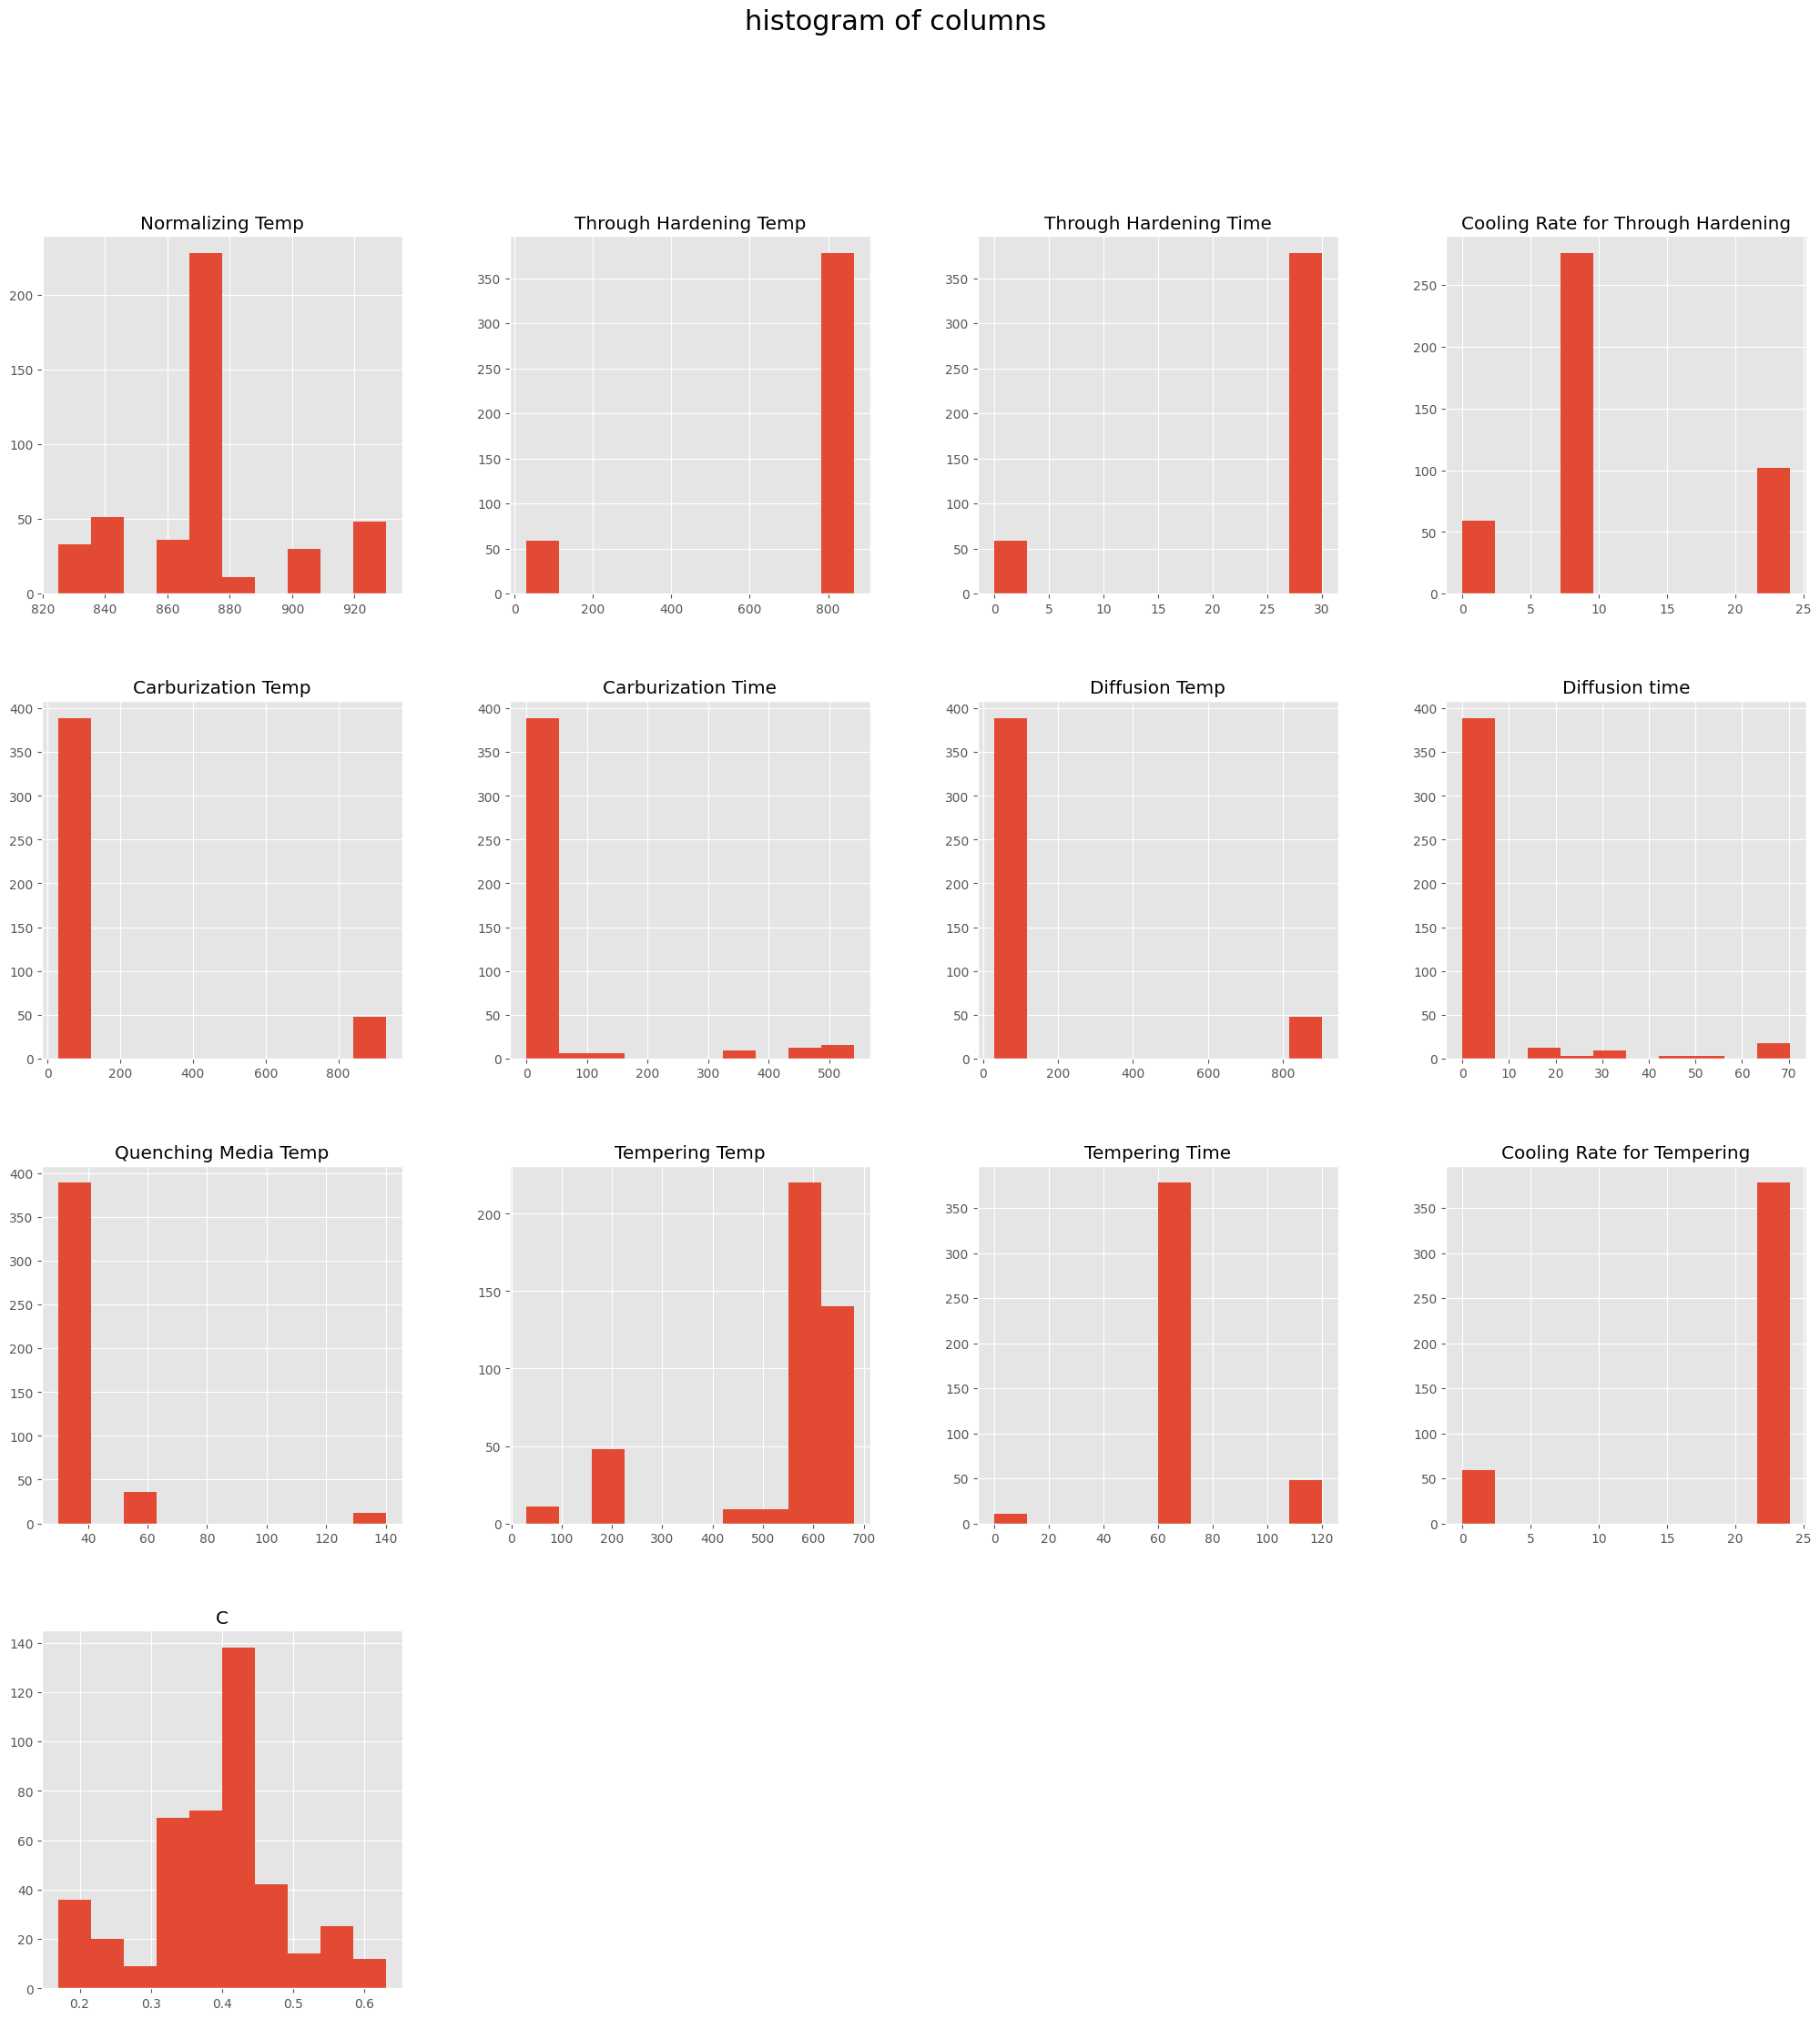

In [10]:
df.iloc[:,1:14].hist(figsize=(25,25))
plt.suptitle('histogram of columns',fontsize=22)
plt.show()

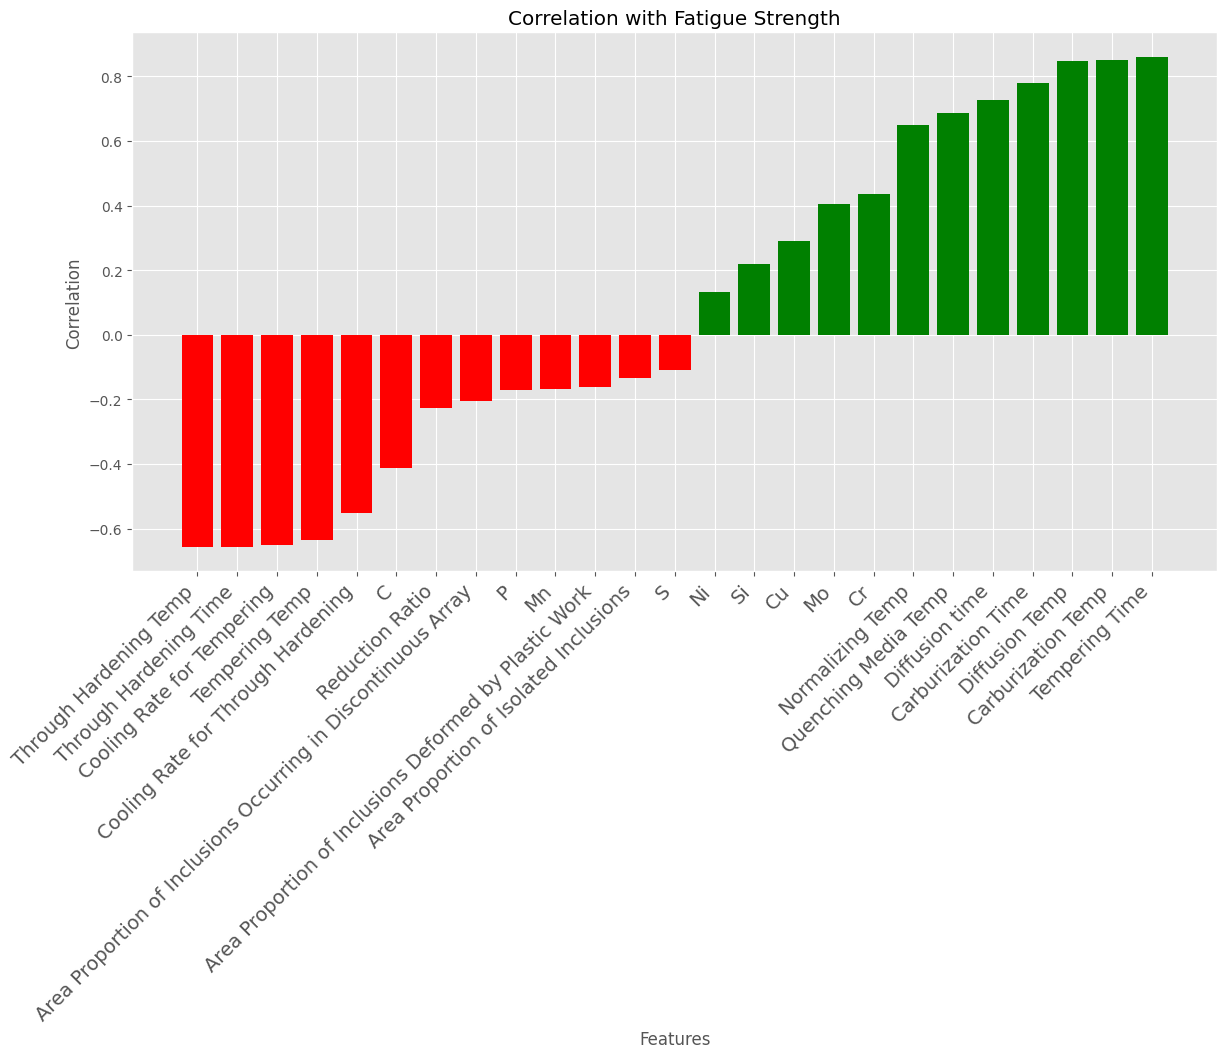

In [16]:
#Correlation between diffrent features and Fatigue Strength
correlation = df.drop(columns=['Sl. No.','Fatigue Strength (10^7 Cycles)']).corrwith(df['Fatigue Strength (10^7 Cycles)'])
correlation.sort_values(inplace=True)
plt.figure(figsize=(14,7))
plt.bar(correlation.index, correlation, color=['green' if val >= 0 else 'red' for val in correlation])
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation with Fatigue Strength')

plt.xticks(rotation=45, ha='right',fontsize=14)
plt.show()           



In [18]:
df.sort_values('Fatigue Strength (10^7 Cycles)',ascending=False).head(10).iloc[:,:14]

,Sl. No.,Normalizing Temp,Through Hardening Temp,Through Hardening Time,Cooling Rate for Through Hardening,Carburization Temp,Carburization Time,Diffusion Temp,Diffusion time,Quenching Media Temp,Tempering Temp,Tempering Time,Cooling Rate for Tempering,C
396,397,930,30,0,0,930,540.0,850.000,15.0,140,160,120,0.5,0.23
428,429,930,30,0,0,930,340.2,895.812,70.2,60,160,120,0.5,0.21
390,391,930,30,0,0,930,139.8,850.000,15.0,60,160,120,0.5,0.23
393,394,930,30,0,0,930,469.8,850.000,15.0,60,160,120,0.5,0.23
423,424,930,30,0,0,930,499.8,895.812,70.2,60,200,120,0.5,0.23
399,400,930,30,0,0,930,469.8,850.000,15.0,60,200,120,0.5,0.23
434,435,930,30,0,0,930,340.2,895.812,70.2,60,200,120,0.5,0.21
406,407,930,30,0,0,930,450.0,895.517,34.8,60,160,120,0.5,0.18
414,415,930,30,0,0,930,100.2,895.517,34.8,60,160,120,0.5,0.23
394,395,930,30,0,0,930,469.8,850.000,15.0,60,160,120,0.5,0.17


In [20]:
df.sort_values('Fatigue Strength (10^7 Cycles)',ascending=False).head(10).iloc[:,14:]

,Si,Mn,P,S,Ni,Cr,Cu,Mo,Reduction Ratio,Area Proportion of Inclusions Deformed by Plastic Work,Area Proportion of Inclusions Occurring in Discontinuous Array,Area Proportion of Isolated Inclusions,Fatigue Strength (10^7 Cycles)
396,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1190
428,0.31,0.81,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.00,0.000,1144
390,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1139
393,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1124
423,0.20,0.80,0.013,0.018,0.04,1.14,0.07,0.02,690,0.070,0.00,0.010,1120
399,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1110
434,0.31,0.81,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.00,0.000,1104
406,0.26,0.76,0.009,0.014,0.56,0.62,0.12,0.17,690,0.060,0.00,0.000,1089
414,0.20,0.80,0.013,0.018,0.04,1.14,0.07,0.02,690,0.070,0.00,0.010,1086
394,0.28,0.55,0.002,0.016,1.64,0.45,0.05,0.16,440,0.017,0.00,0.008,1082


In [22]:
#Creating Regression Model
#Spiltting data into train and test
x=df.drop(columns=['Sl. No.','Fatigue Strength (10^7 Cycles)'])
y=df['Fatigue Strength (10^7 Cycles)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [24]:
#Creating a Random forest regression model
forest_reg=RandomForestRegressor(n_estimators=100, max_depth=100)
forest_reg.fit(x_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred_1=forest_reg.predict(x_test)
rmse_forest=np.sqrt(mean_squared_error(y_test,y_pred_1))
r2_forest=r2_score(y_test,y_pred_1)
scores = cross_val_score(forest_reg, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('RMSE for Random Forest:',rmse_scores.mean()) 
print('R squared for Random Forest:',r2_forest) 


RMSE for Random Forest: 135.36465854420754
R squared for Random Forest: 0.9854016933798683


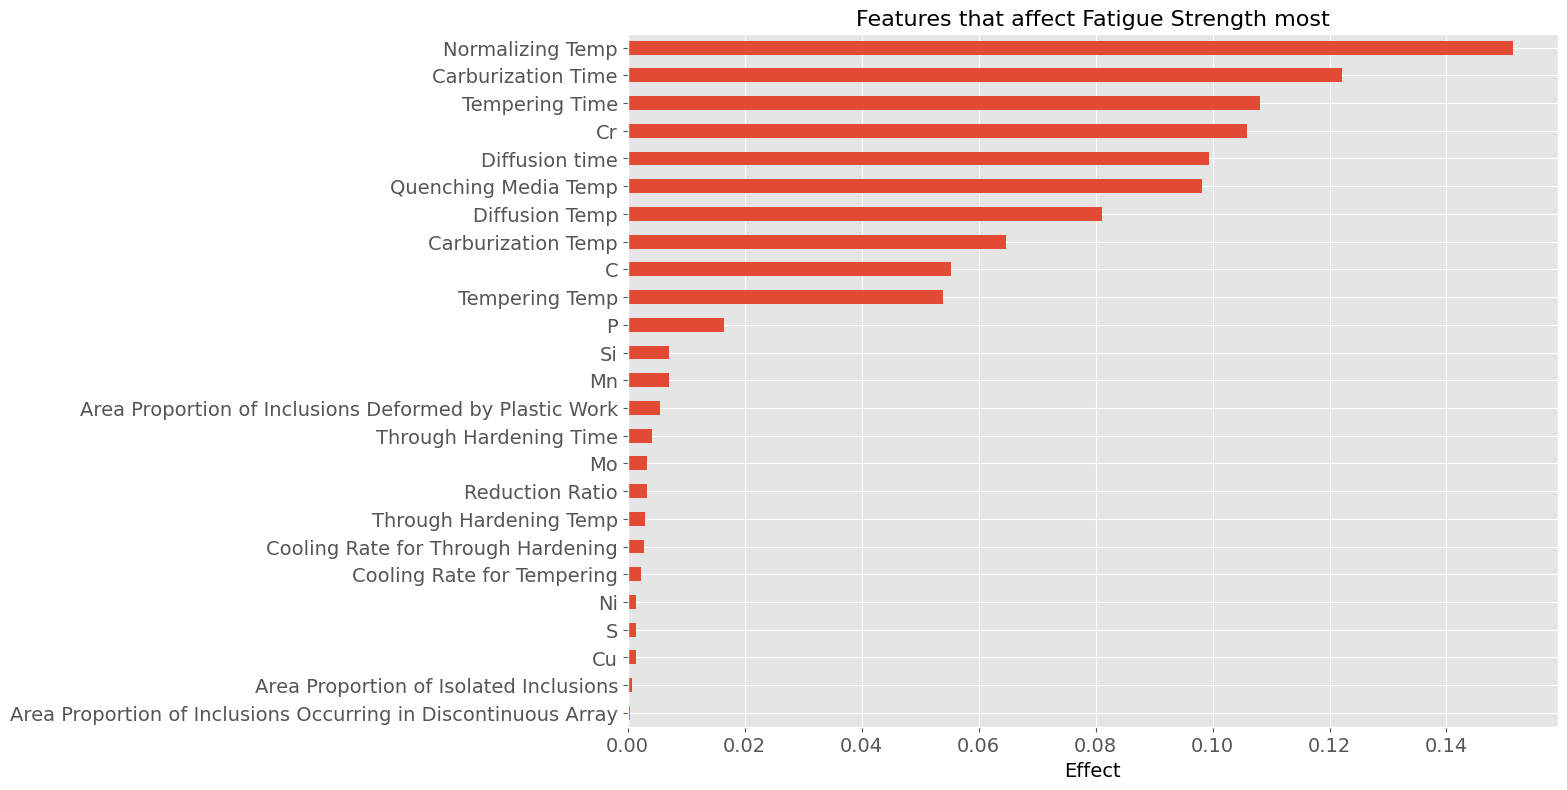

In [26]:
labels=x_train.columns
importanes=forest_reg.feature_importances_
importance_dict=dict(zip(labels,importanes))
importance_series=pd.Series(importance_dict)
importance_series=importance_series.sort_values(ascending=True)
plt.figure(figsize=(12,9))
importance_series.plot(kind='barh')
plt.title('Features that affect Fatigue Strength most',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Effect',fontdict=fontdict)
plt.show()